<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-библиотек-и-данных" data-toc-modified-id="Загрузка-библиотек-и-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек и данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

###### Описание данных
Таблица `rest_data`:<br>
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

## Загрузка библиотек и данных

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import plotly.express as px
import re
from datetime import datetime, timedelta
from scipy import stats as st
from plotly import graph_objects as go

In [2]:
#cнизим размерность чисел для вывода на экран на всем проекте
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# загрузка датасета
try:
    df = pd.read_csv('rest_data.csv')
    df_raw = pd.read_csv('rest_data.csv')
except:
    df = pd.read_csv('/datasets/rest_data.csv')
    df_raw = pd.read_csv('/datasets/rest_data.csv')

## Предобработка данных

In [4]:
#рассмотрим содержимое датасета
display(df.head())
df.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#избавимся от явных дубликатов
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 840.3+ KB


In [6]:
#рассмотрим имеются ли дубликаты id кафе
df['id'].nunique()

15366

In [7]:
#рассмотрим имеются ли дубликаты по сочетанию адрес+тип+название
(df['object_name']+df['object_type']+df['address']).nunique()

15195

В таблице имеются дубликаты, удалим, их менее 2%, но тем не менее, удалим их, чтобы не вносить ошибку в дальнейший анализ.

In [8]:
#удалим дубликаты по сочетанию адрес+тип+название
df=df.drop_duplicates(subset=['object_name','object_type','address']).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15195 entries, 0 to 15194
Data columns (total 7 columns):
index          15195 non-null int64
id             15195 non-null int64
object_name    15195 non-null object
chain          15195 non-null object
object_type    15195 non-null object
address        15195 non-null object
number         15195 non-null int64
dtypes: int64(3), object(4)
memory usage: 831.1+ KB


###### Выводы:
- проанализирована таблица, отсутствуют пропуски в таблице, типы данных в колонках соответствуют содержанию;
- удалены дубликаты, обнаруженные по сочетанию адрес+тип+название.

## Анализ данных

Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [9]:
#подготовим таблицу перед построением графика
cafe_types = df.groupby('object_type', as_index=False)['id'].count()
cafe_types['id'] = cafe_types['id']/df['id'].count()*100
cafe_types=cafe_types.sort_values(by='id')


In [10]:
#напишем функцию для построения графиков
def plot(data, x, y, xlim, label, color):
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.set_color_codes("pastel")
    ax = sns.barplot(x=x, y=y, 
                data= data,
                label="Total", color=color)

    ax.set(xlim=(0, xlim), ylabel="",
           xlabel=label)
    sns.despine(left=True, bottom=True)

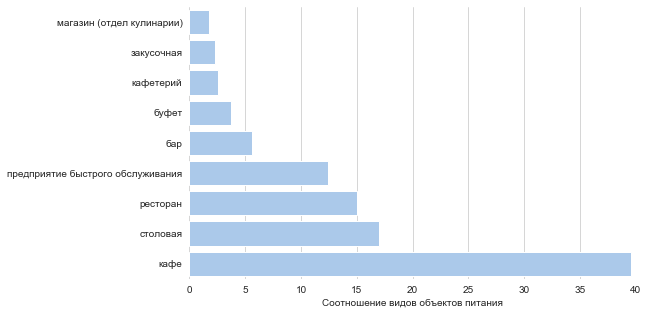

In [11]:
plot(cafe_types,'id', 'object_type', 40,
     "Соотношение видов объектов питания", 'b')

**Вывод**: основную долю в почти 40% составляют кафе. Половину всех заведений делят между собой в основном: столовые (17%), рестораны (15%), предприятия быстрого обсуживания (12%) и бары(6%). 

___

Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

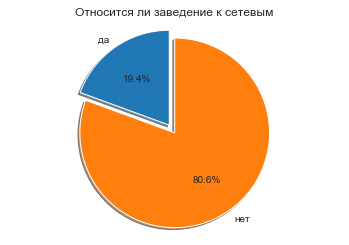

In [12]:
#построим pie-чарт по отношению сетевых заведенеий к несетевым
fig1, ax1 = plt.subplots()
ax1.pie(df.groupby('chain', as_index=False)['id'].count()['id'],
        explode = (0, 0.1),
        labels= df.groupby('chain', as_index=False)['id'].count()['chain'],
        autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Относится ли заведение к сетевым')
plt.show()

**Вывод**: основную долю в почти все-таки составляют несетевые места, занимая 80% рынка.

___

Для какого вида объекта общественного питания характерно сетевое распространение?

In [13]:
#подготовим таблицу перед построением графика
chain_cafes = df[df['chain']=='да'].groupby('object_type', as_index=False)['id'].count()
chain_cafes['id'] = chain_cafes['id']/df[df['chain']=='да']['chain'].count()*100
chain_cafes=chain_cafes.sort_values(by='id')

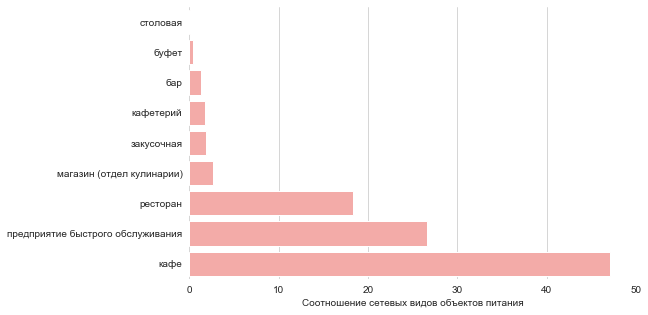

In [14]:
plot(chain_cafes,'id', 'object_type', 50,
     "Соотношение сетевых видов объектов питания", 'r')

**Вывод**: ситуация схожа с общим распределением по заведениям. Основную долю в почти 50% составляют кафе. Половину всех заведений делят между собой в основном: предприятия быстрого обсуживания (>25%), рестораны (~20 %). Однако сетевых столовых и баров значительно меньше.

___

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

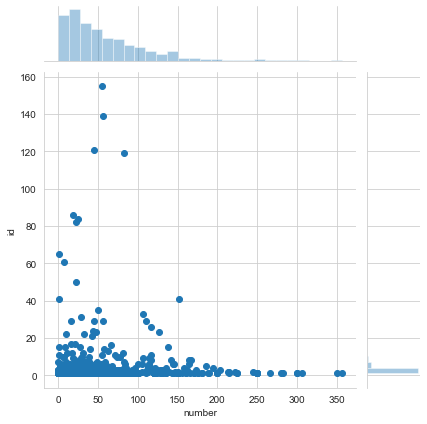

In [15]:
#построим joinplot показывающий отношение количества заведений к среднему количесту посадочных
#мест для 1 заведения с распределением, где id - количество заведений, number - количество мест
sns.jointplot(x=df[df['chain']=='да'].groupby('object_name',as_index=False)['number'].mean()['number'], 
              y=df[df['chain']=='да'].groupby('object_name',as_index=False)['id'].count()['id'],
              data=df[df['chain']=='да'], height = 6);

**Вывод:** львиная доля точек находтся в промежутке до 100 посадочных мест с количеством заведений вплоть до 140 точек. Однозначно можно сказать, что небольшое количество посадочных мест с большим количеством заведений более характерно для сетевых мест.

___

Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [16]:
#подготовим таблицу для построения графика
cafe_types_numbers = (df.groupby('object_type', as_index=False)['number'].mean()
                      .sort_values(by='number'))

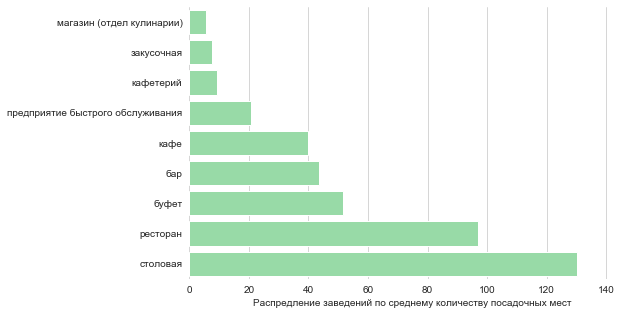

In [17]:
plot(cafe_types_numbers,'number', 'object_type', 150,
     "Распредление заведений по среднему количеству посадочных мест", 'g')

**Вывод:** наибольшее количество посадочных мест находится в столовых, около 130 в среднем. Следом с числом чуть меньше 100 идут рестораны. В буфетах, барах и кафе посадочных мест почти в 2 раза меньше, чем в ресторанах, чуть больше 40.

___

Выделите в отдельный столбец информацию об улице из столбца address .

In [18]:
#подготовим функция для выделения улицы из адреса
house_names = ['дом', 'владение', 'домовладение'] # cловарь для поиска
def street(address):
    for i in range(len(address.split())):
        if address.split()[i] in house_names:
            return ' '.join(address.split()[2:i]).replace(',','')

In [19]:
#создадим столбец street
df['streetname']=df['address'].apply(street)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15195 entries, 0 to 15194
Data columns (total 8 columns):
index          15195 non-null int64
id             15195 non-null int64
object_name    15195 non-null object
chain          15195 non-null object
object_type    15195 non-null object
address        15195 non-null object
number         15195 non-null int64
streetname     15056 non-null object
dtypes: int64(3), object(5)
memory usage: 949.8+ KB


Остались без улиц 139 заведений, что составляет менее 1%. Посмотрим в чем причина.

In [20]:
df[df['streetname'].isna()].head()

,index,id,object_name,chain,object_type,address,number,streetname
1402,1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1403,1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1404,1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1405,1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None
1406,1410,150537,Кафе «Вечный зов»,нет,кафе,"город Москва, город Зеленоград, корпус 834А",30,None


Причина в городе Зеленограде, который отмечен как город Москва, при этом не имеет улиц. Для анализа, с учетом исключения данных менее 1% можно оставить пропуски.

___

Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [21]:
#подготовим таблицу с рейтингом
street_rating = (df[~df['streetname'].isna()]
                 .groupby('streetname', as_index=False).agg({'id':'count'}))
street_rating.head()

,streetname,id
0,,45
1,1-й Автозаводский проезд,3
2,1-й Амбулаторный проезд,2
3,1-й Балтийский переулок,1
4,1-й Басманный переулок,1


In [22]:
#подгрузим внешнюю таблицу с улицами Москвы
from io import BytesIO
import requests
spreadsheet_id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
areas = pd.read_csv(BytesIO(r.content))
areas.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [23]:
#подготовим таблицу топ-10
top_streets = (street_rating.merge(right=areas, on='streetname', how='left')
    .groupby('streetname', as_index=False).agg({'id':'max', 'okrug':'unique'})
    .sort_values(by='id', ascending=False))[0:10]

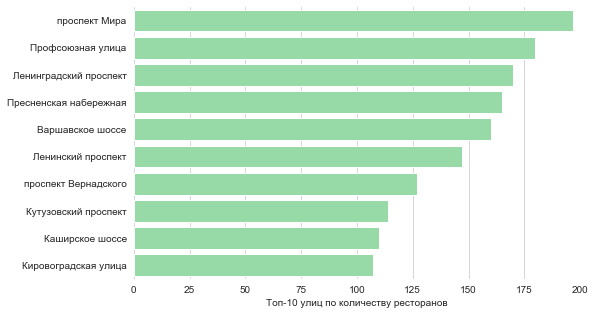

In [24]:
plot(top_streets,'id', 'streetname', 200,
     "Топ-10 улиц по количеству ресторанов", 'g')

In [25]:
#подготовим таблицу топ-10 для улиц в 1 районе
top_alone = (street_rating.merge(right=areas, on='streetname', how='left')
    .groupby('streetname', as_index=False).agg({'id':'max', 'area':'count'})
    .sort_values(by='id', ascending=False))
top_alone = top_alone[top_alone['area']==1][0:10]

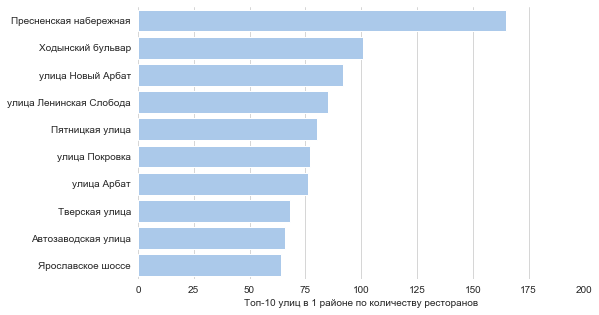

In [26]:
plot(top_alone,'id', 'streetname', 200,
     "Топ-10 улиц в 1 районе по количеству ресторанов", 'b')

**Вывод:**
- самое большое количество ресторанов на проспекте Мира, достигает почти 200. Следом в топе Профсоюзная улица и Ленинградский проспекте;
- улицы с наибольшим количество ресторанов приурочены к ЦАО, СВАО, ЮЗАО, ЮАО, ЗАО - по сути секто от западного до южного административных округов вместе с центральным;
- так же выделены улицы, находящиеся в 1 районе, особое внимание следует обратить на Пресненскую набережную, которая входит в оба топ-10, а значит наиболее плотная по количеству заведений.

___

Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [27]:
#подготовим таблицу для построения графика количества улиц в 1 районе
#с 1 кафе в нем. индекс 0 отметаем - там рестораны без района
#связано, скорее всего, с нахождением их в пригородах
antitop = (street_rating[street_rating['id']==1]
           .merge(right=areas, on='streetname', how='left')
           .groupby('streetname', as_index=False)
           .agg({'id':'max', 'okrug':'unique','area':'sum'})
           .sort_values(by='id').groupby('area', as_index=False)
           .agg({'id':'sum'}).sort_values(by='id', ascending=False)[1:11])

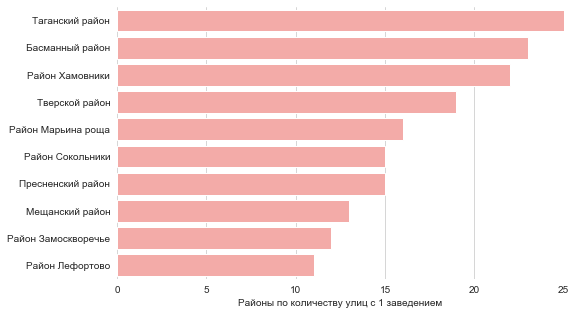

In [28]:
plot(antitop,'id', 'area', 25, 
     "Районы по количеству улиц с 1 заведением", 'r')

**Вывод:** наибольшее количество улиц в 1 рестораном на улице относятся к Таганскому, Басманному и району Хамовники. Более 15 таких улиц относятся к Тверскому района, так же Марьиной рощи.

___

Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

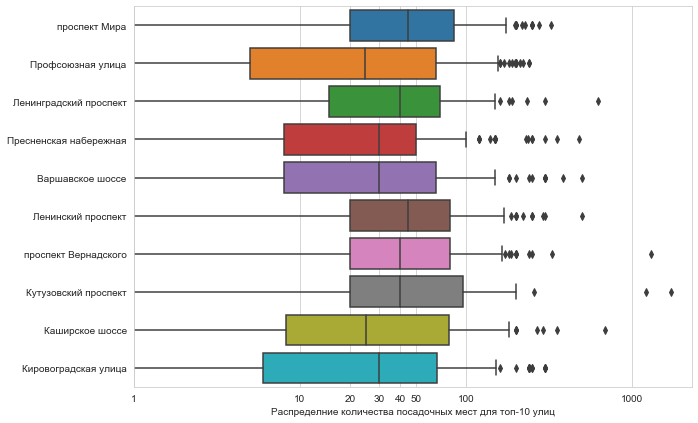

In [29]:
#подготовим датасет и таблицу распределения количества мест для топ-10 улиц
top_10_numbers = top_streets.merge(df, on='streetname')
plt.figure(figsize = (10,7))
sns.set_style("whitegrid")
sns.set_color_codes("pastel")
ax=sns.boxplot(x='number', y='streetname' , data=top_10_numbers)
ax.set_xscale("log")
ticks = [1, 10, 20, 30, 40, 50, 100, 1000]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set(ylabel='',xlabel='Распределние количества посадочных мест для топ-10 улиц');

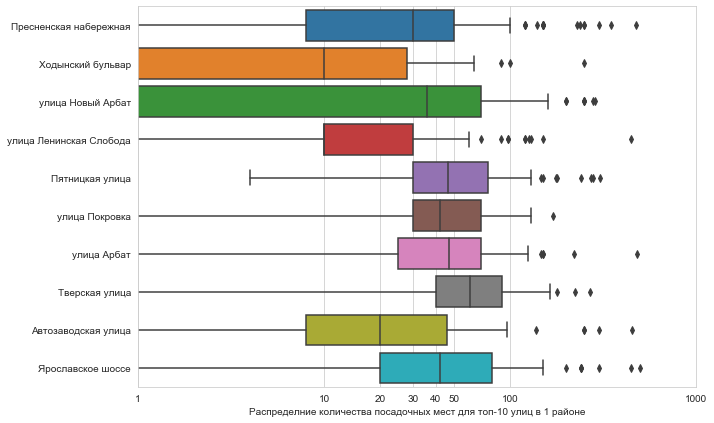

In [30]:
#подготовим датасет и таблицу распределения количества мест для топ-10 улиц в 1 районе
top_alone_numbers = top_alone.merge(df, on='streetname')
plt.figure(figsize = (10,7))
sns.set_style("whitegrid")
sns.set_color_codes("pastel")
ax=sns.boxplot(x='number', y='streetname' , data=top_alone_numbers)
ax.set_xscale("log")
ticks = [1, 10, 20, 30, 40, 50, 100, 1000]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set(ylabel='',xlabel='Распределние количества посадочных мест для топ-10 улиц в 1 районе');

## Выводы

- проанализирована таблица, отсутствуют пропуски в таблице, типы данных в колонках соответствуют содержанию;
- удалены дубликаты, обнаруженные по сочетанию адрес+тип+название;
- основную долю в списке заведений, почти 40%, составляют кафе. Половину всех заведений делят между собой в основном: столовые (17%), рестораны (15%), предприятия быстрого обсуживания (12%) и бары(6%);
- основную долю заведений все-таки составляют несетевые места, занимая 80% рынка;
- ситуация по распределению среди сетевых мест схожа с общим распределением по заведениям. Основную долю в почти 50% составляют кафе. Половину всех заведений делят между собой в основном: предприятия быстрого обсуживания (>25%), рестораны (~20 %). Однако сетевых столовых и баров значительно меньше;
- львиная доля сетевых заведений имеет до 100 посадочных мест с количеством заведений вплоть до 140. Однозначно можно сказать, что небольшое количество посадочных мест с большим количеством заведений более характерно для сетевых мест;
- наибольшее количество посадочных мест находится в столовых, около 130 в среднем. Следом с числом чуть меньше 100 идут рестораны. В буфетах, барах и кафе посадочных мест почти в 2 раза меньше, чем в ресторанах, чуть больше 40;
- самое большое количество ресторанов на проспекте Мира, достигает почти 200. Следом в топе Профсоюзная улица и Ленинградский проспекте;
- улицы с наибольшим количество ресторанов приурочены к ЦАО, СВАО, ЮЗАО, ЮАО, ЗАО - по сути секто от западного до южного административных округов вместе с центральным;
- так же выделены улицы, находящиеся в 1 районе, особое внимание следует обратить на Пресненскую набережную, которая входит в оба топ-10, а значит наиболее плотная по количеству заведений;
- наибольшее количество улиц в 1 рестораном на улице относятся к Таганскому, Басманному и району Хамовники. Более 15 таких улиц относятся к Тверскому района, так же Марьиной рощи.

### Рекомендации
Исходя из полученных данных, начать стоит с несетевого кафе, с количеством посадочных мест в районе 40. Поскольку проект дорогой, необходимо ориентироваться на улицы и районы с уже большим количеством заведений, вроде проспекта Ленина, Профсоюзной улицы, это указывает на достаточный поток, способный прокормить данный объем заведений и обходить стороной районы с малым количеством заведений, вроде Таганского или Басманного. Особое внимание следует обратить на Пресненскую набережную, которая входит топ-10 по количеству заведений, при этом компактно располагается в 1 районе, а значит наиболее плотная по количеству заведений, в таких районах количество мест ограничено 40-50, поэтому остановится следует на этом варианте.

В подтверждение слов прилагаю презентацию:
https://disk.yandex.ru/i/wJycDz9bj16FHA